## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT WATER PROPERTY
from sam_analysis.water.property_position import WaterPropertyPosition

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line

## SET PATHS AND LOAD DATA

In [2]:
## WORKING DIRECTORY
project_dir = r"/mnt/r/simulations/polar_sams/unbiased"
sam_dir     = r"sam_single_12x12_separated_300K_dodecanethiol0.25_C12CONH20.75_tip4p_nvt_CHARMM36"
sample_dir  = r"sample1"
output_dir  = r"output_files"
working_dir = os.path.join( project_dir, sam_dir, sample_dir, )

## TRAJ NAME
traj_name   = r"sam_prod"

## INITIALIZE WATER POSITION
obj = WaterPropertyPosition( sim_working_dir  = working_dir,
                             input_prefix     = traj_name,
                             property_value   = 90,
                             recompute_coords = False )

## COMPUTE COORDINATES
coords1, _ = obj.property_positions()


LOADING PKL FILE...
LOADED PKL FROM /mnt/r/simulations/polar_sams/unbiased/sam_single_12x12_separated_300K_dodecanethiol0.25_C12CONH20.75_tip4p_nvt_CHARMM36/sample1/output_files/sam_prod_theta90_positions.pkl



In [3]:
## WORKING DIRECTORY
project_dir = r"/mnt/r/simulations/polar_sams/unbiased"
sam_dir     = r"sam_single_12x12_separated_300K_dodecanethiol0.25_C12CONH20.75_tip4p_nvt_CHARMM36"
sample_dir  = r"sample2"
output_dir  = r"output_files"
working_dir = os.path.join( project_dir, sam_dir, sample_dir )

## TRAJ NAME
traj_name   = r"sam_prod"

## INITIALIZE WATER POSITION
obj = WaterPropertyPosition( sim_working_dir  = working_dir,
                             input_prefix     = traj_name,
                             property_value   = 90,
                             recompute_coords = False )

## COMPUTE COORDINATES
coords2, _ = obj.property_positions()

LOADING PKL FILE...
LOADED PKL FROM /mnt/r/simulations/polar_sams/unbiased/sam_single_12x12_separated_300K_dodecanethiol0.25_C12CONH20.75_tip4p_nvt_CHARMM36/sample2/output_files/sam_prod_theta90_positions.pkl



In [4]:
bin_width = 0.4
x = np.arange( 0, 5.2, bin_width )
dist1 = np.histogram( coords1[:,0], bins = len(x) )[0]
dist2 = np.histogram( coords2[:,0], bins = len(x) )[0]
d1 = dist1 / np.min([ dist1.sum(), dist2.sum() ])
d2 = dist2 / np.min([ dist1.sum(), dist2.sum() ])


--- CREATING LINE PLOT ---


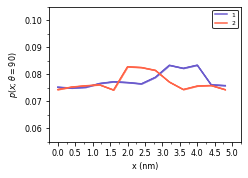

In [5]:
## PLOT LINE
plot_line( [ x, x ], [ d1, d2 ],
           yerr        = [],
           xlabel      = r"x (nm)",
           ylabel      = r"$p(x; \theta=90)$",
           xticks      = [ 0, 5.0, 0.5 ],
           yticks      = [ 0.06, 0.1, 0.01 ],
           colors      = [ "slateblue", "tomato" ],
           line_labels = [ "1", "2" ],
           legend_cols = 1,
           fig_path    = None, )